In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [2]:
# Load the dataset
df = pd.read_csv("../2-transform/elections/export/combined_election_data.csv")

/tmp/ipykernel_182661/3709595826.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../2-transform/elections/export/combined_election_data.csv")


# Voter Turnout Over Years

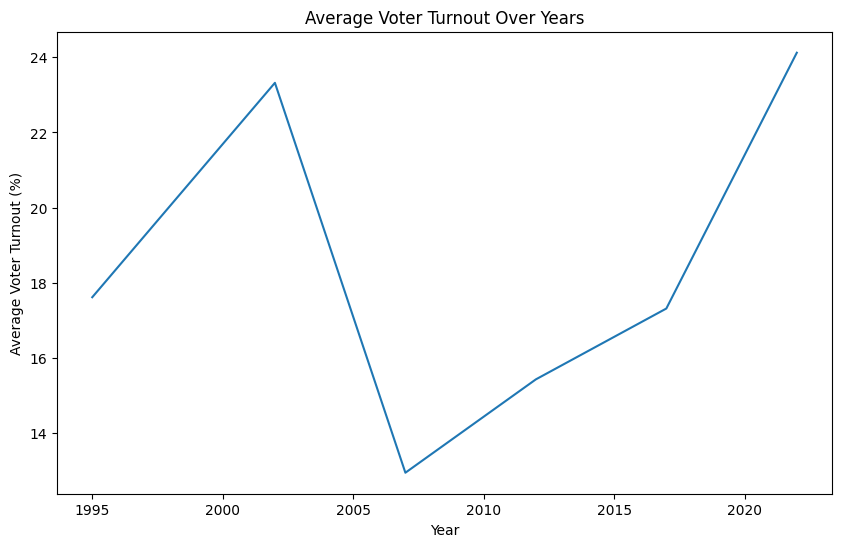

In [3]:
turnout_by_year = df.groupby('Year')['% Abs/Ins'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=turnout_by_year, x='Year', y='% Abs/Ins')
plt.title('Average Voter Turnout Over Years')
plt.xlabel('Year')
plt.ylabel('Average Voter Turnout (%)')
plt.show()

# Number of Votes per Candidate Over Years

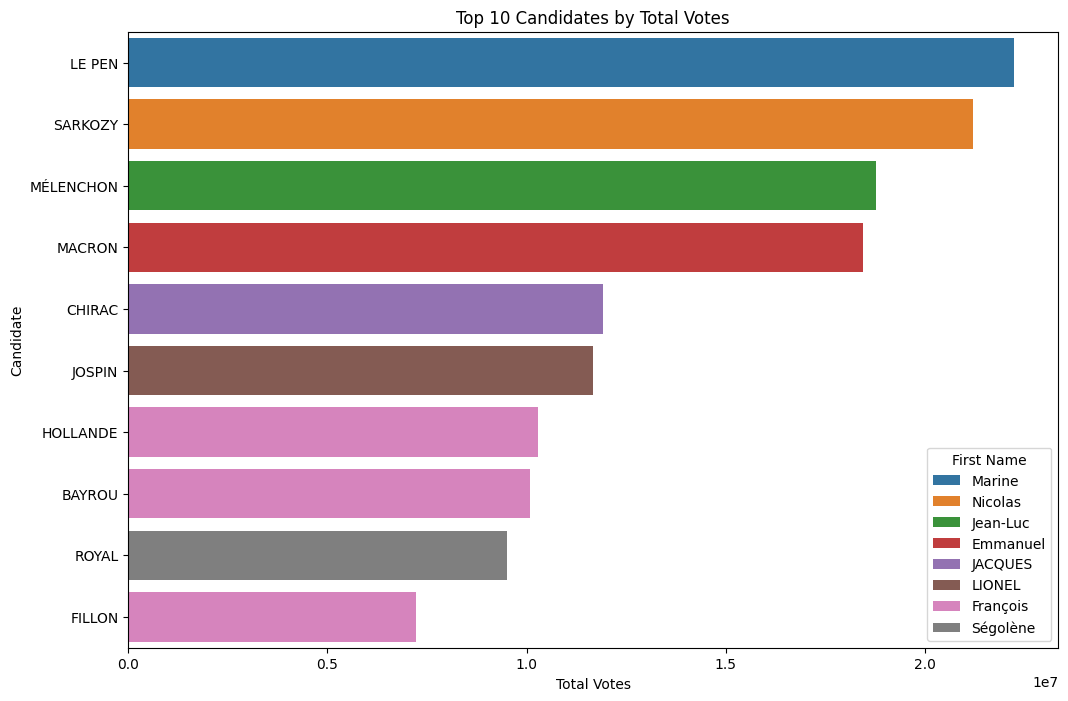

In [4]:
# Aggregate votes per candidate across all years
votes_per_candidate = df.groupby(['Nom', 'Prénom'])['Voix'].sum().reset_index().sort_values(by='Voix', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=votes_per_candidate, x='Voix', y='Nom', hue='Prénom', dodge=False)
plt.title('Top 10 Candidates by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Candidate')
plt.legend(title='First Name')
plt.show()

# Gender Distribution of Candidates

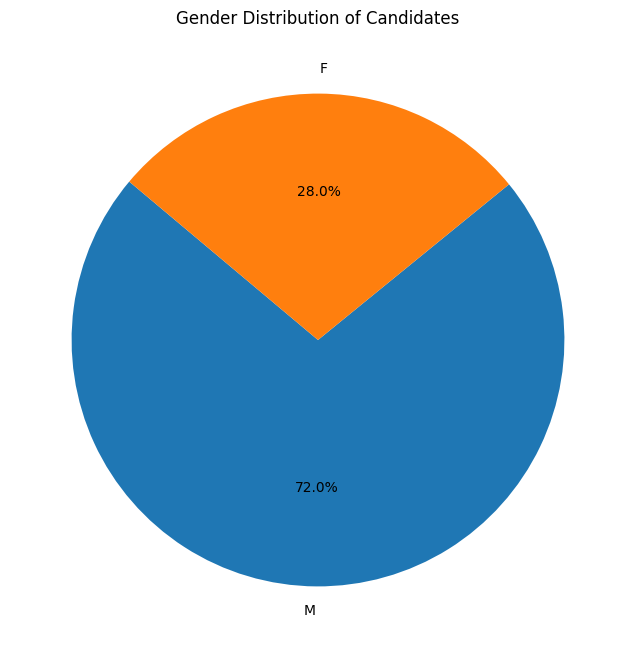

In [5]:
# Count the number of male and female candidates
gender_distribution = df['Sexe'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Candidates')
plt.show()

# Correlation Heatmap

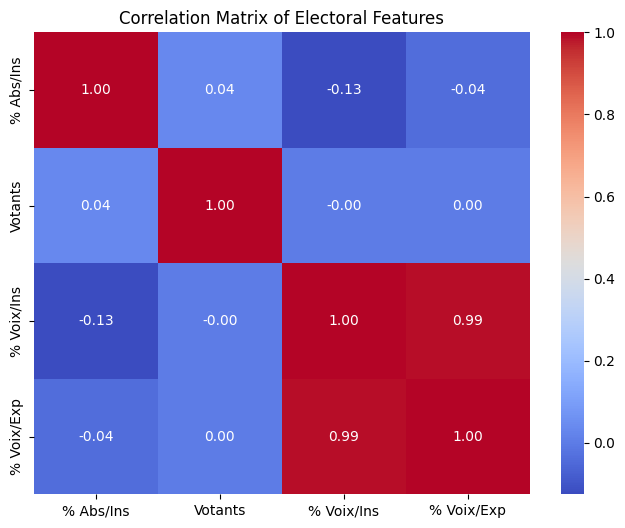

In [11]:
# Calculate correlation matrix
corr = df[['% Abs/Ins', 'Votants', '% Voix/Ins', '% Voix/Exp']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Electoral Features')
plt.show()

# Distribution of Votes Among Candidates

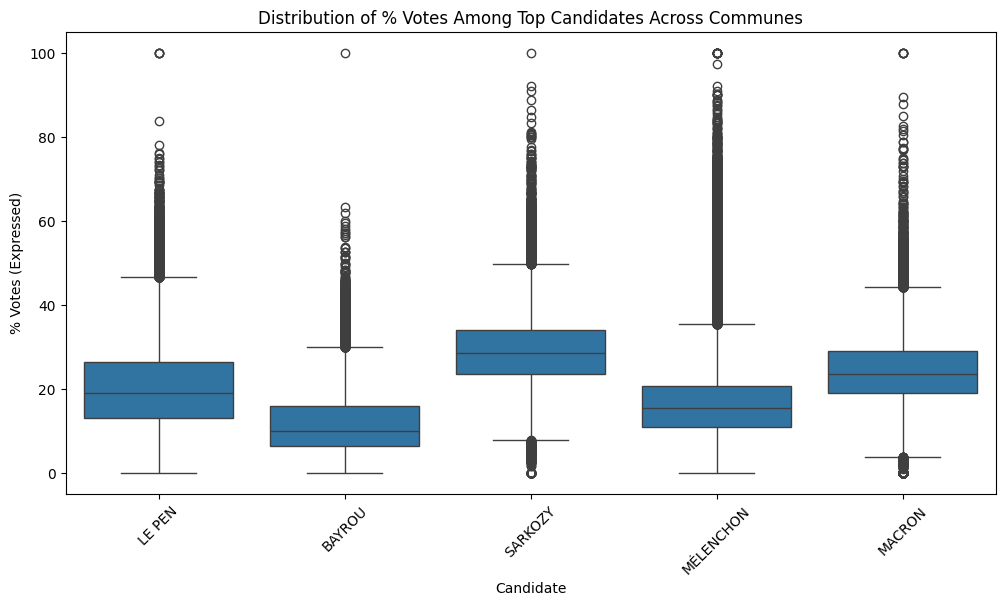

In [12]:
# Example: Distribution of % votes for the top 5 candidates across communes
top_candidates = df.groupby('Nom')['Voix'].sum().nlargest(5).index  # Identify top 5 candidates by total votes
df_top_candidates = df[df['Nom'].isin(top_candidates)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_candidates, x='Nom', y='% Voix/Exp')
plt.title('Distribution of % Votes Among Top Candidates Across Communes')
plt.xlabel('Candidate')
plt.ylabel('% Votes (Expressed)')
plt.xticks(rotation=45)
plt.show()

# Socio-Economic Factors vs. Voting Patterns

In [14]:
# Assuming socio-economic data is merged into the dataframe
# Example: Scatter plot of unemployment rate vs. voter turnout

sns.scatterplot(data=df, x='unemployment_rate', y='% Abs/Ins', hue='Year')
plt.title('Unemployment Rate vs. Voter Turnout by Year')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Voter Turnout (%)')
plt.legend(title='Year')
plt.show()


ValueError: Could not interpret value `unemployment_rate` for `x`. An entry with this name does not appear in `data`.